In [6]:
!pip install torchvision

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np

# standard plotting library
import matplotlib.pyplot as plt

In [4]:
## Helper zum Plotten 

def show_image_grid(X, y=None, y_pred=None, title=None, nrow=6, ncol=4, **kwargs):
    max_num = nrow*ncol
    X = X[:max_num]
    if len(X) < max_num:
        ncol = len(X) // nrow + 1
    if isinstance(X, np.ndarray):
        X = torch.from_numpy(X)
    if X.dim() != 4:
        X = X[:, None]

    plt.figure(title, figsize=(2*nrow, 2*ncol + (0 if y is None else 1)))
    if title:
        plt.title(title)
        
    if isinstance(y, torch.Tensor):
        y = y.numpy()
        
    for i, Xi in enumerate(X):
        plt.subplot(ncol, nrow, i+1)
        img = Xi.numpy().transpose((1, 2, 0))
        if img.shape[2] == 1:
            img = img[..., 0]
        plt.imshow(img)

        title = ""
        if y is not None:
          title += str(int(y[i]))
        if y_pred is not None:
          title += "/" + str(int(y_pred[i]))
        if len(title) > 0: 
          plt.title(title)

        plt.axis('off')
    
    plt.axis('off')


# Unser erstes Netz

## Daten Laden

In [8]:
train_data = datasets.MNIST(root='./data', train=True, 
                            download=True, transform=transforms.ToTensor())
train_data

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:06<00:00, 1553482.81it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 255960.14it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2230760.00it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 18126097.78it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:

batch_size = 128
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
train_loader

valid_data = datasets.MNIST(root='./data', train=False, 
                            download=True, transform=transforms.ToTensor())
valid_loader = torch.utils.data.DataLoader(valid_data, shuffle=False, batch_size=batch_size)

label tensor(5)


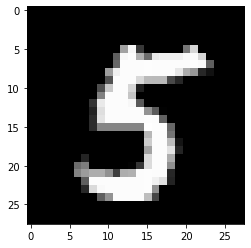

In [47]:
x, y = next(iter(train_loader))

plt.gray() # sets matplotlib colormap
plt.imshow(x[0,0])
print("label",y[0])

## Das Netz trainieren

In [74]:
def accuracy(output, label):
    return (output.argmax(1) == label).float().mean()

lr = 0.1

# wir definieren unser "netz" 
weight = torch.zeros((28*28, 10), requires_grad=True)
bias = torch.zeros(10, requires_grad=True)

losses = []
for epoch in range(1):
    # train on mini batches
    for X, y in train_loader:
        # forward pass
        output = X.view(-1, 28*28) @ weight + bias    
        
        # compute loss        
        loss = F.cross_entropy(output,y)
        losses.append(loss.item())
        
        # backward pass
        loss.backward()
        with torch.no_grad():
          weight -= lr * weight.grad
          weight.grad.zero_()
          bias -= lr * bias.grad
          bias.grad.zero_()
    
    # measure accuracy on the validation set
    acc = accuracy(output,y)
    print("epoch % 5d: loss: % 8.5f accuracy: %4.2f" % (epoch, torch.mean(torch.tensor(losses)), acc.item()))    


epoch     0: loss:  0.57209 accuracy: 0.90


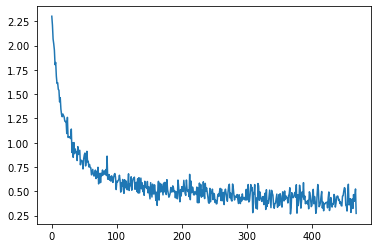

In [76]:
plt.plot(losses)

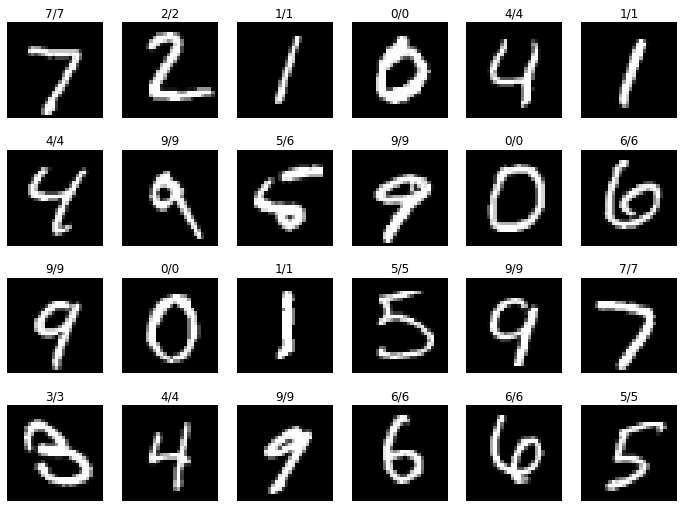

In [ ]:
Xv, yv = next(iter(valid_loader))
prediction = Xv.view(-1, 28*28) @ weight + bias  
show_image_grid(Xv, y=yv, y_pred=prediction.argmax(dim=1))

In [ ]:
W = weight.detach()
W.shape

torch.Size([784, 10])

In [ ]:
W[:, 0]

tensor([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00, -7.5276e-06, -1.8094e-05, -1.7932e-06,
        -7.4717e-08,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00, -2.9294e-08, -1.4370e-07, -4.7796e-06,
        -1.4008e-05, -7.3284e-05, -1.3777e-04, -3.6515e-04,  1.3153e-04,
         7.3651e-04,  1.3780e-04, -4.7058e-04,  1.2015e-04,  8.5093e-04,
         2.4247e-04, -2.6327e-04, -2.7573e-04, -1.8358e-04, -7.2371e-05,
        -1.6141e-05, -5.7871e-07,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00, -2.4148e-05,  4.1286e-05,
        -2.7504e-06, -2.3142e-05, -3.1268e-04, -5.0649e-04, -1.2218e-03,
        -2.9639e-03, -4.2952e-03, -5.2365e-03, -6.7

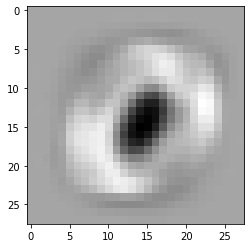

In [ ]:
plt.imshow(W[:, 0].reshape(28, 28))

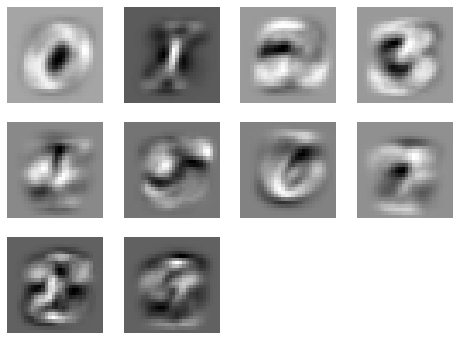

In [ ]:
show_image_grid(W.reshape(28, 28, 10).permute(2, 0, 1), nrow=4)